In [25]:
import pandas as pd
import numpy as np
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
)
le = LabelEncoder()
age = pd.read_csv('age2.csv')
df = pd.read_csv('kidney_disease.csv')
print(df)


      id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no   
1    

In [26]:
df['rbc'] = le.fit_transform(df['rbc'])
df ['pc'] = le.fit_transform(df['pc'])
df ['pcc'] = le.fit_transform(df['pcc'])
df ['ba'] = le.fit_transform(df['ba'])
df ['htn'] = le.fit_transform(df['htn'])
df ['dm'] = le.fit_transform(df['dm'])
df ['cad'] = le.fit_transform(df['cad'])
df ['appet'] = le.fit_transform(df['appet'])
df ['pe'] = le.fit_transform(df['pe'])
df ['ane'] = le.fit_transform(df['ane'])
df = df.drop(columns=[ 'id'])
df = df.fillna(0)

df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,121.0,...,44,7800,5.2,1,4,1,0,0,0,ckd
1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,0.0,...,38,6000,0,0,3,1,0,0,0,ckd
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31,7500,0,0,4,1,1,0,1,ckd
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32,6700,3.9,1,3,1,1,1,1,ckd
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35,7300,4.6,0,3,1,0,0,0,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,47,6700,4.9,0,3,1,0,0,0,notckd
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,54,7800,6.2,0,3,1,0,0,0,notckd
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,49,6600,5.4,0,3,1,0,0,0,notckd
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,51,7200,5.9,0,3,1,0,0,0,notckd


In [27]:

age['location'] = le.fit_transform(age['region'])
age['gender'] = le.fit_transform(age['gender'])
age['age'] = le.fit_transform(age['age'])
age['status'] = le.fit_transform(age['status'])
age = age.drop(columns=[ 'region', 'location'])
age = age.fillna(0)
age


,status,age,gender,1968,1969,1970,1971,1972,1973,1974,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,3,0,2,49242,48219,47864,47691,47561,47520,47752,...,68995,69711,70079,70190,70496,70430,70082,69371,68028,67197.0
1,3,0,3,46810,45855,45783,45708,45209,45015,45257,...,64980,65625,66056,65621,66026,66359,66341,65916,65037,64160.0
2,3,10,2,43002,45383,47624,48865,49268,48184,46291,...,62789,64730,66314,68291,69225,69945,70533,71220,70485,70234.0
3,3,10,3,40697,43197,45274,46466,46770,46075,44196,...,59512,61323,62741,64253,64974,65801,66272,66711,65760,65772.0
4,3,1,2,40683,41148,41359,41553,41617,42444,44264,...,52346,54638,57404,59551,62174,64566,66756,68382,70023,70475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,5,22,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
703,5,22,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
704,0,23,1,44,47,54,55,58,62,68,...,889,916,870,923,1008,944,1035,1167,1279,0.0
705,4,21,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


      age    bp     sg   al   su  rbc  pc  pcc  ba    bgr  ...  hemo  pcv  \
0    48.0  80.0  1.020  1.0  0.0    2   1    0   0  121.0  ...  15.4   44   
1     7.0  50.0  1.020  4.0  0.0    2   1    0   0    0.0  ...  11.3   38   
2    62.0  80.0  1.010  2.0  3.0    1   1    0   0  423.0  ...   9.6   31   
3    48.0  70.0  1.005  4.0  0.0    1   0    1   0  117.0  ...  11.2   32   
4    51.0  80.0  1.010  2.0  0.0    1   1    0   0  106.0  ...  11.6   35   
..    ...   ...    ...  ...  ...  ...  ..  ...  ..    ...  ...   ...  ...   
395  55.0  80.0  1.020  0.0  0.0    1   1    0   0  140.0  ...  15.7   47   
396  42.0  70.0  1.025  0.0  0.0    1   1    0   0   75.0  ...  16.5   54   
397  12.0  80.0  1.020  0.0  0.0    1   1    0   0  100.0  ...  15.8   49   
398  17.0  60.0  1.025  0.0  0.0    1   1    0   0  114.0  ...  14.2   51   
399  58.0  80.0  1.025  0.0  0.0    1   1    0   0  131.0  ...  15.8   53   

       wc   rc  htn dm cad appet  pe  ane  
0    7800  5.2    1  4   1     

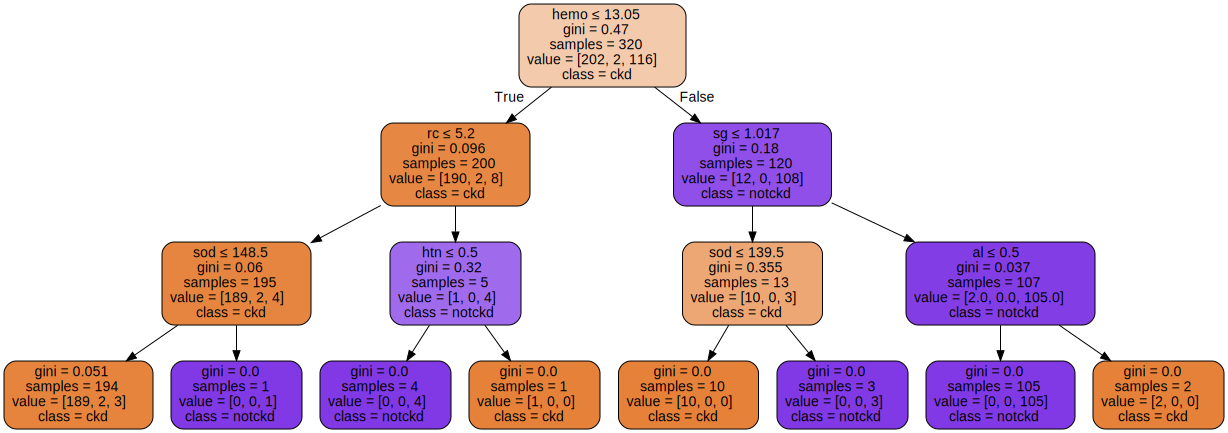

In [28]:

df.replace('?', np.nan, inplace=True)
df.replace('\t?', np.nan, inplace=True)
y = df['classification']      
X = df.drop(columns=[ 'classification'])
print(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)


clf = DecisionTreeClassifier(
    max_depth=3
)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

dot_data = export_graphviz(
    clf, 
    out_file=None, 
    feature_names=X.columns,  
    class_names=clf.classes_.astype(str),  
    filled=True, 
    rounded=True,  
    special_characters=True
)

graph = graphviz.Source(dot_data)  
graph.render("decision_tree_kidney")
graph


     age  gender   1968   1969   1970   1971   1972   1973   1974   1975  ...  \
0      0       2  49242  48219  47864  47691  47561  47520  47752  47165  ...   
1      0       3  46810  45855  45783  45708  45209  45015  45257  44452  ...   
2     10       2  43002  45383  47624  48865  49268  48184  46291  45062  ...   
3     10       3  40697  43197  45274  46466  46770  46075  44196  43371  ...   
4      1       2  40683  41148  41359  41553  41617  42444  44264  45825  ...   
..   ...     ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
702   22       2      0      0      0      0      0      0      0      0  ...   
703   22       3      0      0      0      0      0      0      0      0  ...   
704   23       1     44     47     54     55     58     62     68     75  ...   
705   21       0      0      0      0      0      0      0      0      0  ...   
706   23       0      0      0      0      0      0      0      0      0  ...   

      2012   2013   2014   

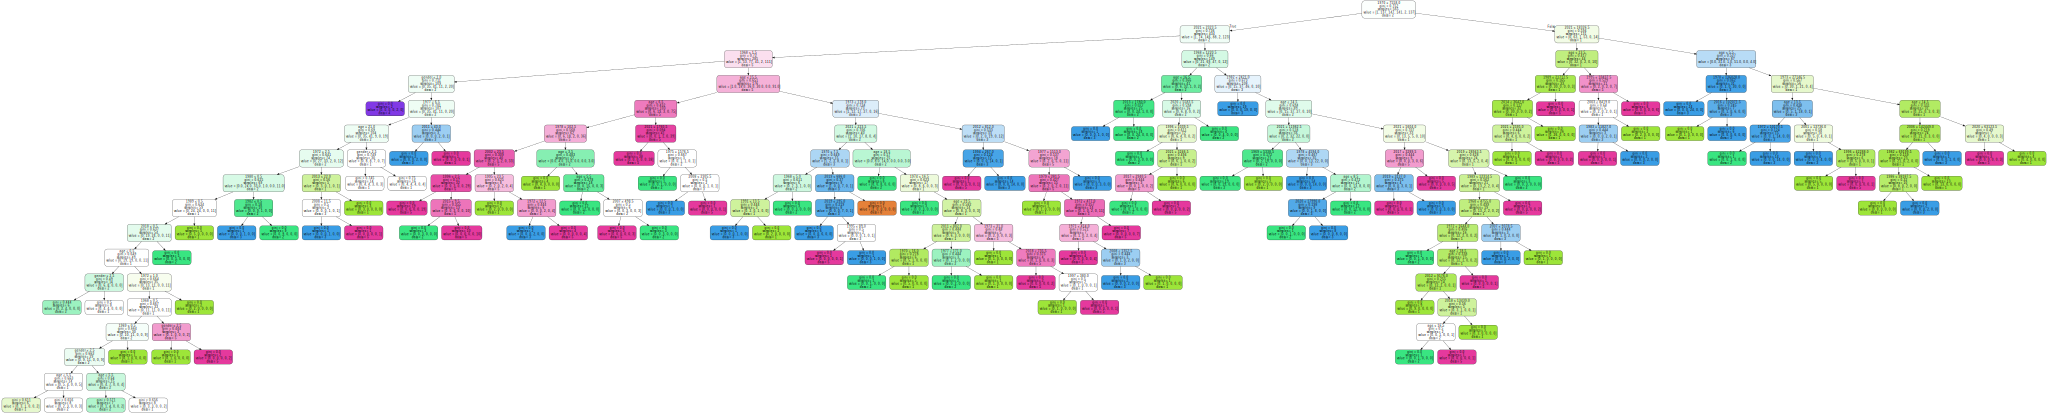

In [29]:
y = age['status']      
X = age.drop(columns=[ 'status'])
print(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)


clf = DecisionTreeClassifier(

)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

dot_data = export_graphviz(
    clf, 
    out_file=None, 
    feature_names=X.columns,  
    class_names=clf.classes_.astype(str),  
    filled=True, 
    rounded=True,  
    special_characters=True
)

graph = graphviz.Source(dot_data)  
graph.render("decision_tree_population")
graph
